<h1><center>
pymcabc: A Particle Physics Toy Toolbox for the ABC Model
</center></h1>
<h3><center>
Aman Desai <br><br>
<a>amanmukeshdesai@gmail.com</a>
</center></h3>

**PyPI** https://pypi.org/project/pymcabc/

**Source** https://github.com/amanmdesai/pymcabc

**PrePrint** https://zenodo.org/record/8181098

**Current Software Version** 1.1

=========================================================================

### In this talk:

- ABC model of particle physics
- Features and use of pymcabc software
- Lineshape of heavy scalar mediator with pymcabc

=========================================================================

### ABC Model

**Motivation**: The ABC model simplifies understanding:
- Feynman Diagrams - Matrix element (Dynamics)
- Results can be cross-checked by pencil-paper


**Features**

- The ABC model consists of three scalar particles (spin-zero).
- Interaction is only possible when all three particles are present at the interaction vertex

#### Lagrangian of the ABC model

$\mathcal{L} = 
\frac{1}{2} \partial_{\mu} \phi_{A} \partial^{\mu}\phi_{A} +
\frac{1}{2} \partial_{\mu} \phi_{B} \partial^{\mu}\phi_{B} +  
\frac{1}{2} \partial_{\mu} \phi_{C} \partial^{\mu}\phi_{C}  -  
\frac{1}{2} m_{A}^{2} \phi_{A}^2  - 
\frac{1}{2} m_{B}^{2} \phi_{B}^2  - 
\frac{1}{2} m_{C}^{2} \phi_{C}^2  - 
 ig \phi_{A}\phi_{B}\phi_{C}
$

- $\phi_i$ - wavefunction of a particle
- $m$ -  mass of the particle
- $g$ -  coupling constant.

Each particle, if free, follows the Klein-Gordon Equation.

=========================================================================

### The pymcabc software

- Computes differential/total cross-section and decay widths (Dynamics, Kinematics/Phase-space)
- Can work with ***any*** Leading Order process in the ABC model 
- Generates Feynman diagrams 
- Simulates Scattering processes 
- Decays heavy particle in final state
- Possible to get 2, 3 or 4 particles final state
- Toy detector effects assuming separate resolution for momentum and energy measurements
- specific channel simulation for the individual $s-, t-,$ and $u-$ channels (may not be physical). 
- Output in ".csv" and ".root" format for analysis.
- Analysis with Pandas, Uproot, PyROOT, ROOT, possible
- Minimum user interaction required
- Documentation included in preprint

=========================================================================

### Installation

via terminal: 

```code
pip install pymcabc
```

In [1]:
#! pip install pymcabc 

=========================================================================

### Simulating $A C \rightarrow B^* \rightarrow A C$ process with pymcabc

**Step 1.** Import the package

In [2]:
import pymcabc

**Step 2.** Define the physics process, model parameters ($m_i$) and ($g = 1$).

No need to define the mediator explicitly.

In [3]:
pymcabc.DefineProcess("A C > A C", mA=20, mB=2, mC=4, pi=15)

**Step 3.** Obtain Feynman diagrams of possible scattering and decay processes

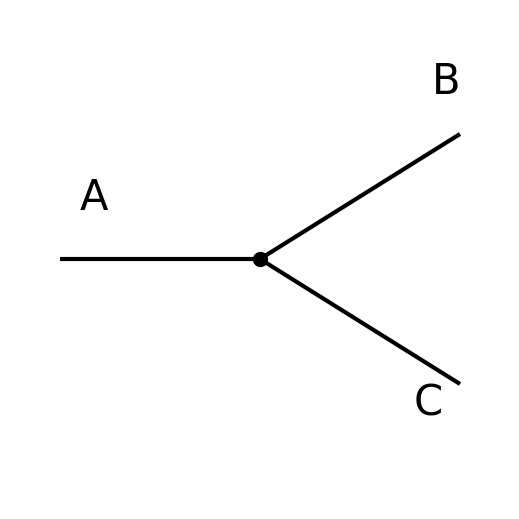

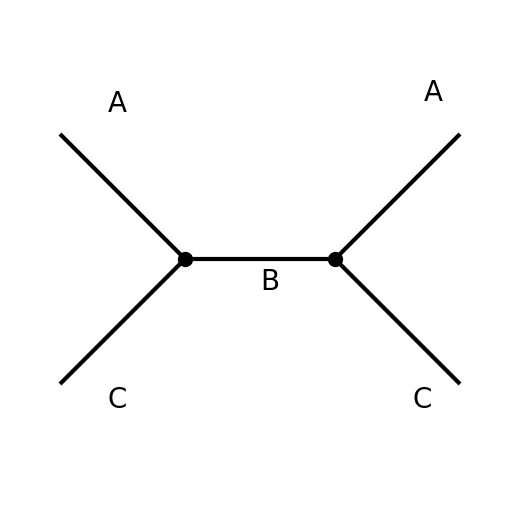

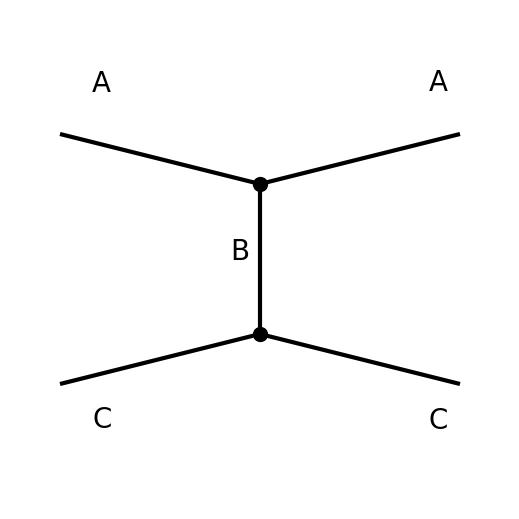

In [4]:
pymcabc.FeynmanDiagram()

**Step 4.** Calculate the cross-section

In [5]:
pymcabc.CrossSection().calc_xsection()

(1.333806154471762e-12, 1.1914160508051288e-13)

**Step 5.** Simulate the process (set properties to define whether one wants decay of heavy particle state, detector) 

In [6]:
pymcabc.SaveEvent(100, boolDecay=True, boolDetector=True).to_root("file_test_ac_ac.root")

generating event  100  of  100


**Optional Step** Convert file into CSV format

In [7]:
pymcabc.convert_tocsv(inputname ="file_test_ac_ac.root",outputname ="file_test_ac_ac.csv")

~~~

~~~
### Toy Detector Configuration

**Parameters**:
- ```detector_sigma``` - gaussian width for energy measurements
- ```detector_factor``` - control the relative gaussian width for momentum measurements 

**Example Usage**
```
pymcabc.SaveEvent(100, boolDecay=True, boolDetector=True,detector_sigma=1.2, detector_factor=0.9).to_root("file_test_ac_ac.root")
```
defines a detector configuration with: 
- the gaussian width in energy measurements is 1.2 $\sigma$ 
- for momentum measurements it is 1.08  $\sigma$.

~~~

~~~

**Step 6.**  Plot the MC data

/home/amdesai/.local/lib/python3.10/site-packages/pymcabc/plotting.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


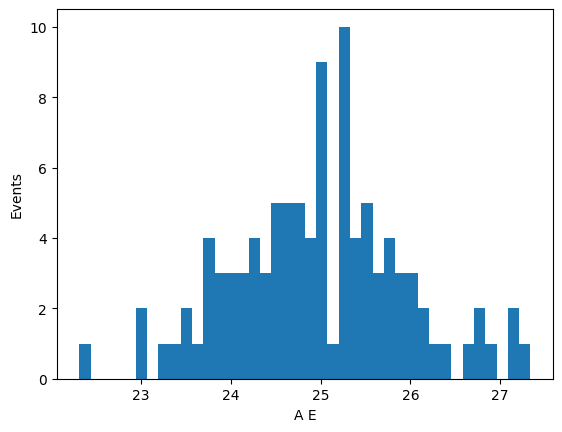

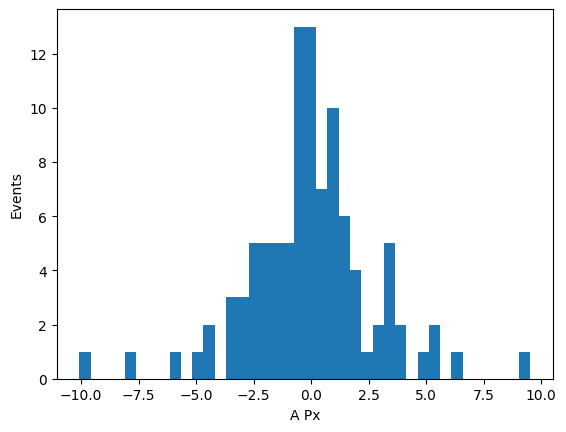

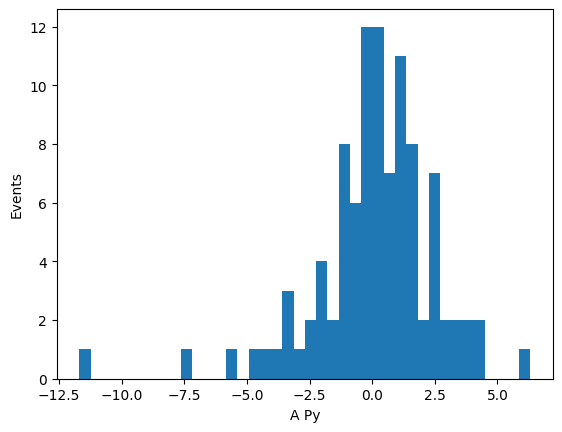

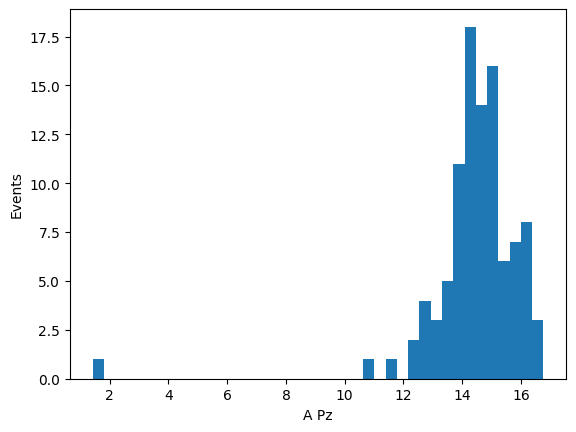

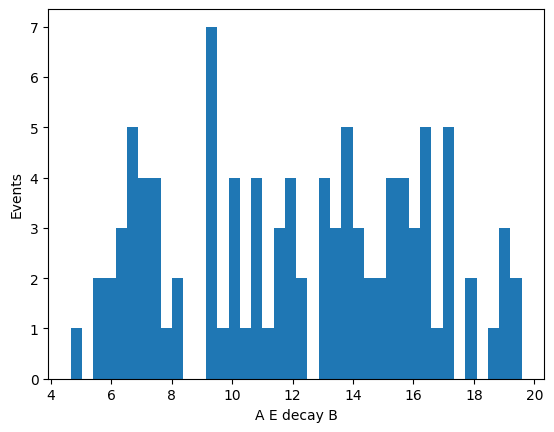

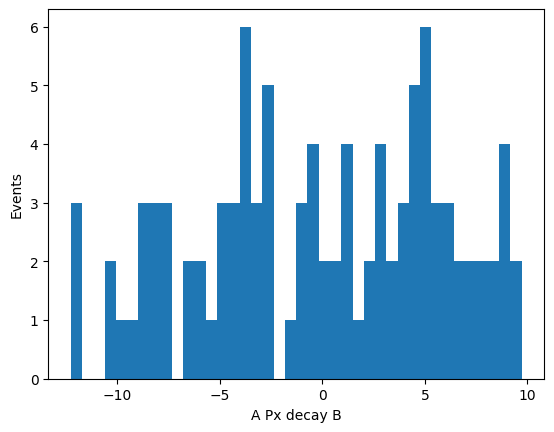

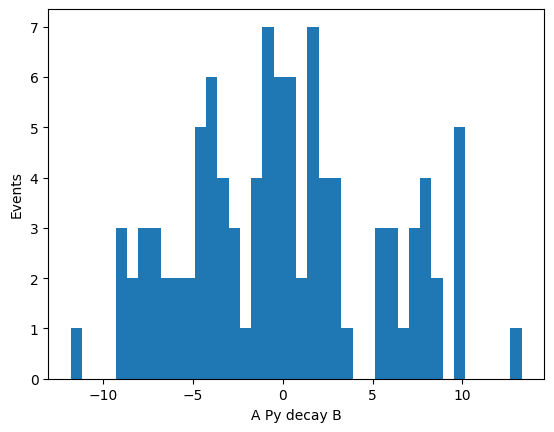

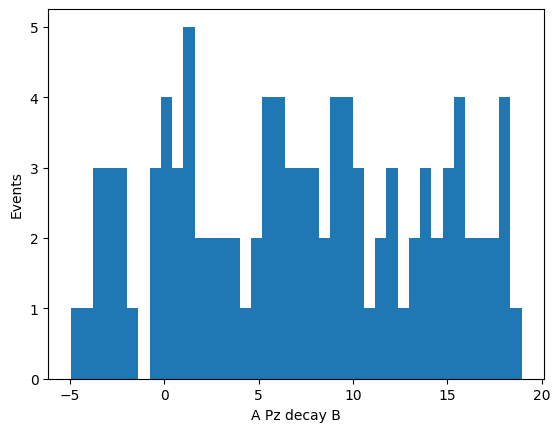

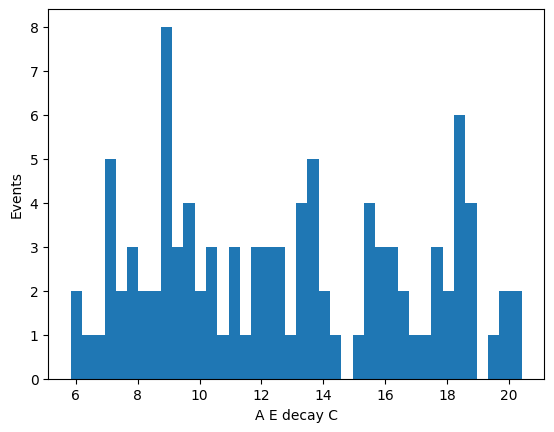

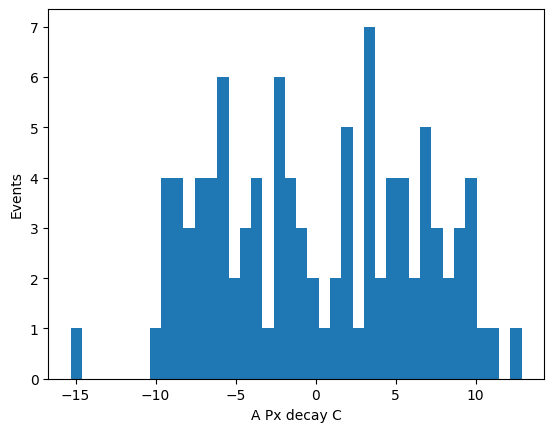

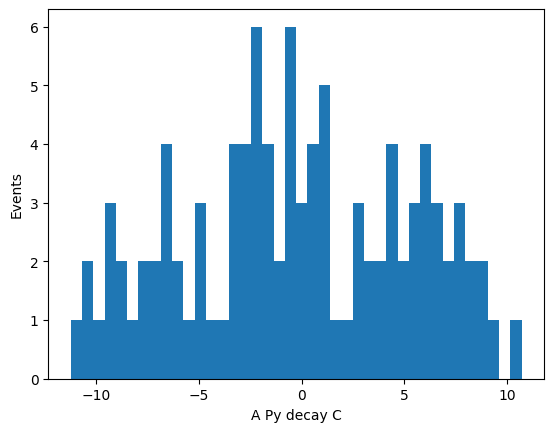

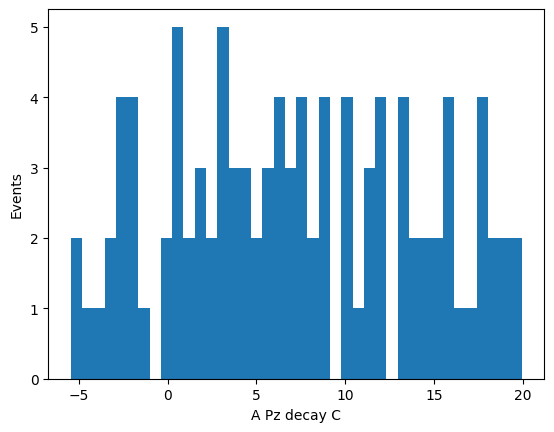

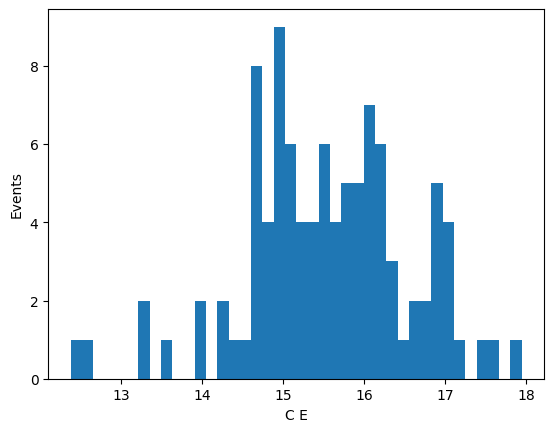

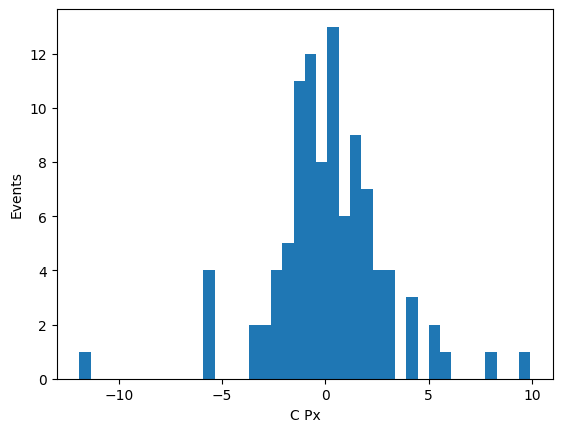

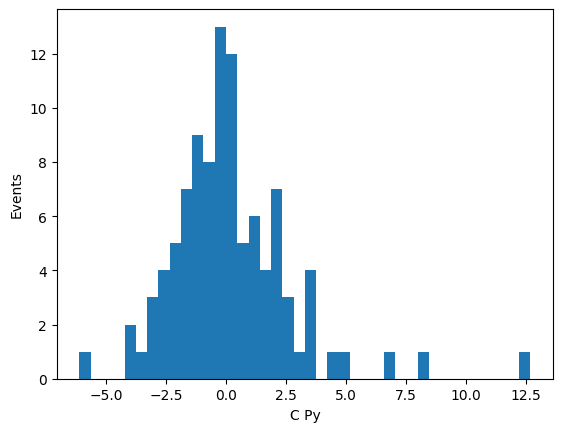

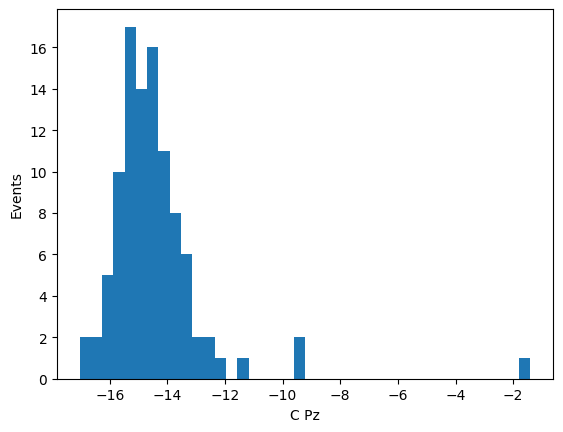

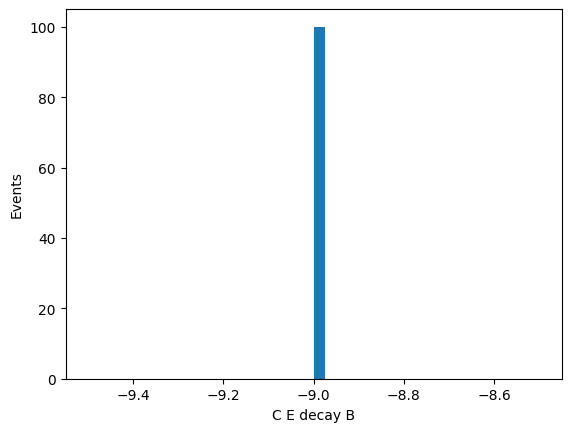

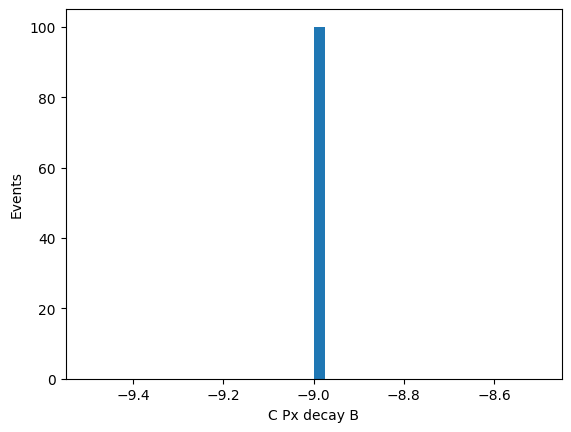

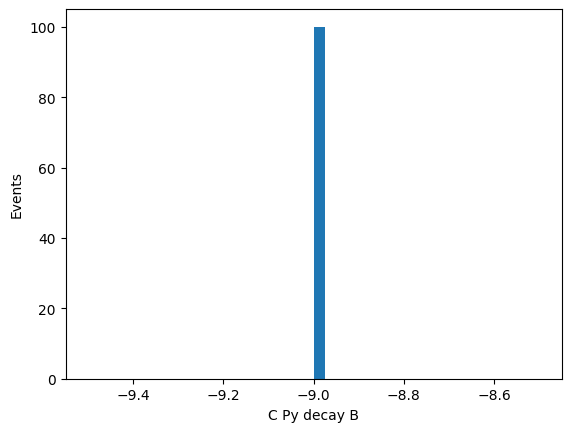

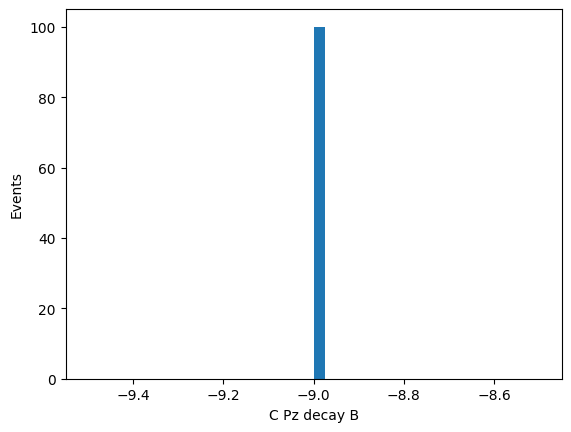

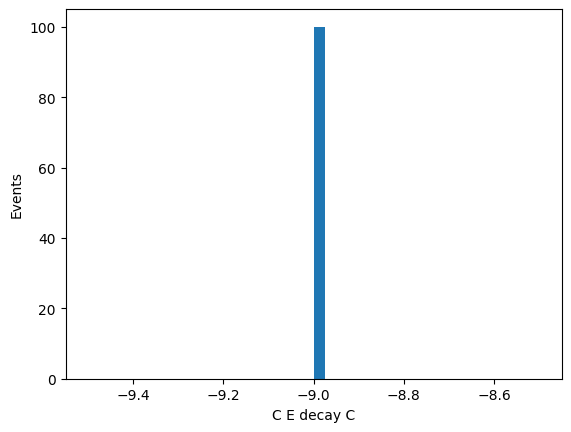

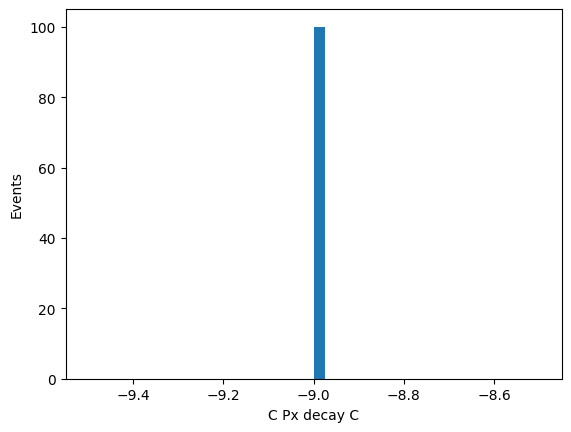

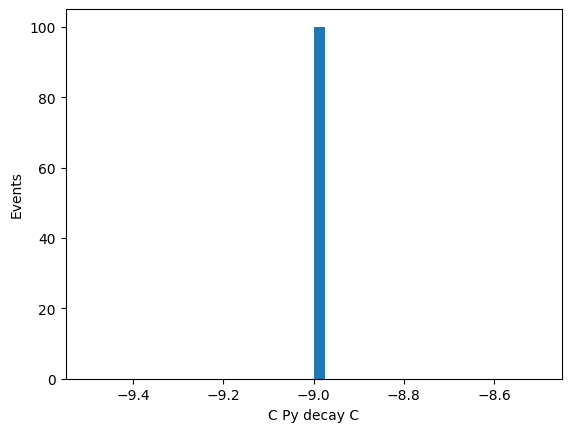

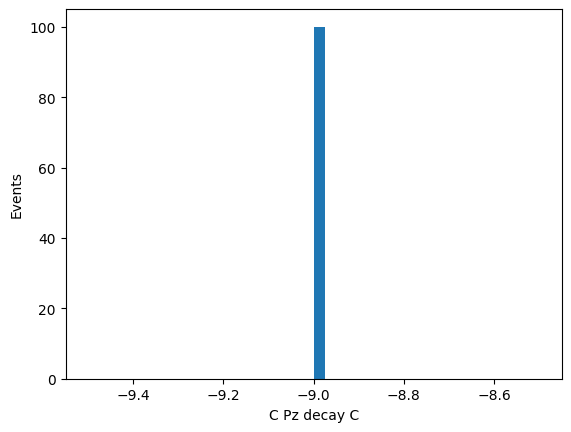

In [8]:
pymcabc.PlotData.file("file_test_ac_ac.root")




~~~

~~~


### Lineshape of a Heavy mediator with pymcabc


 $s-$channel process: $\sigma$ increases as $E_{cm} \rightarrow Mass_{mediator}$ 



**Step 1.** Import necessary softwares

In [9]:
import pymcabc
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal


**Step 2.** Define a set of momentum/energies


In [10]:
p = np.linspace(.1,50,100)
sigma = [0]*len(p)
energy = [0]*len(p)

**Step 3.** Run pymcabc to evaluate cross section over a set momentum

In [11]:
for i in range(len(p)):
    a=pymcabc.DefineProcess('B C > B C',mA=35,mB=1,mC=1,pi=p[i],channel='s')
    width = a.width()
    energy[i] = a.ECM()[2]
    _sigma,error=pymcabc.CrossSection().calc_xsection(N=2000) # N is the number of MC integration points
    sigma[i] = _sigma*1e12


 Energy Beam 1 :  1.004987562112089 
 Energy Beam 2 :  1.004987562112089 
 Energy CM :  2.009975124224178

 Energy Beam 1 :  1.1682742870205158 
 Energy Beam 2 :  1.1682742870205158 
 Energy CM :  2.3365485740410317

 Energy Beam 1 :  1.4925960864336396 
 Energy Beam 2 :  1.4925960864336396 
 Energy CM :  2.9851921728672792

 Energy Beam 1 :  1.8970858711642884 
 Energy Beam 2 :  1.8970858711642884 
 Energy CM :  3.794171742328577

 Energy Beam 1 :  2.3405426690653908 
 Energy Beam 2 :  2.3405426690653908 
 Energy CM :  4.6810853381307815

 Energy Beam 1 :  2.804542498638726 
 Energy Beam 2 :  2.804542498638726 
 Energy CM :  5.609084997277452

 Energy Beam 1 :  3.2803796617824865 
 Energy Beam 2 :  3.2803796617824865 
 Energy CM :  6.560759323564973

 Energy Beam 1 :  3.763566962605029 
 Energy Beam 2 :  3.763566962605029 
 Energy CM :  7.527133925210058

 Energy Beam 1 :  4.251599145780129 
 Energy Beam 2 :  4.251599145780129 
 Energy CM :  8.503198291560258

 Energy Beam 1 :  4.742

**Step 4.** Finally make plots

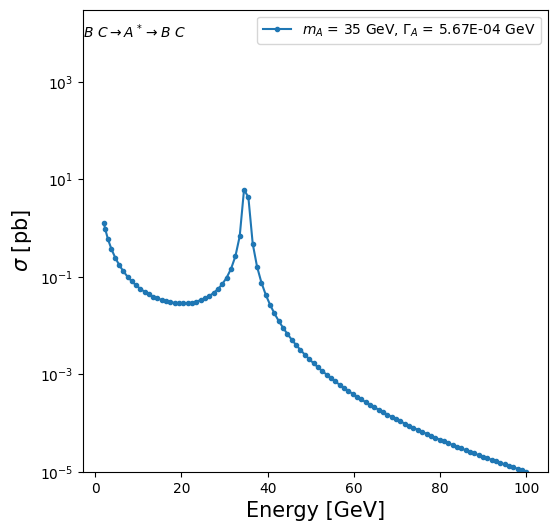

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(energy, sigma, marker='o', markersize=3, label='$m_A$ = 35' + ' GeV, $\Gamma_{A}$ = '+str('%.2E' %Decimal(width)) + ' GeV')
ax.set_ylim(1e-5,3e4)
ax.set_xlabel(r'Energy [GeV]',fontsize=15)
ax.set_ylabel(r'$\sigma$ [pb]',fontsize=15)
ax.text(x=0.,y=0.94,s='$B ~C \\rightarrow A^* \\rightarrow B ~C$', fontsize=10,transform=ax.transAxes)
ax.tick_params(axis="both",labelsize=10)
ax.set_yscale('log')
plt.legend(prop={'size': 10})
plt.show()

### Summary

- pymcabc is a Toy Toolbox for the ABC Model
- The package can also generate decays of heavy particles
- it includes toy detector simulation

For more details and other applications, please see: 

1. https://doi.org/10.5281/zenodo.7546325

In [13]:
! rm *png *root *csv *json *pdf